In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [50]:
iris=pd.read_csv("../data/Iris.csv")

In [51]:
X=iris.drop(columns=["Species"])
y=iris["Species"]

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2)

In [53]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [54]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)

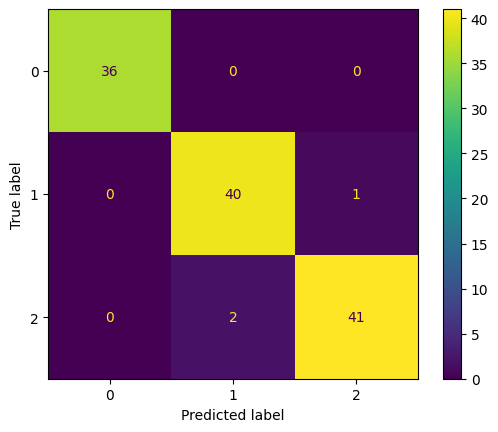

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Use one of the multiclass-friendly averaging options
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(precision)
print(recall)
print(f1)



Accuracy: 0.975
0.9761904761904762
0.9763660427301947
0.9761871013465627


In [57]:
param_grid = [
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [100, 200]
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [100, 200],
        'multi_class': ['ovr', 'multinomial']
    }
]


In [58]:
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid.fit(X_train_scaled,y_train)

c:\Users\91941\OneDrive\Desktop\Rohit\Programs\Python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,estimator,LogisticRegression()
,param_grid,"[{'C': [0.01, 0.1, ...], 'max_iter': [100, 200], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, {'C': [0.01, 0.1, ...], 'max_iter': [100, 200], 'multi_class': ['ovr', 'multinomial'], 'penalty': ['l1', 'l2'], ...}]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [59]:
grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [60]:
grid_pred=grid.predict(X_test_scaled)

In [61]:
print("Accuracy:", accuracy_score(y_test, grid_pred))

# Use one of the multiclass-friendly averaging options
precision = precision_score(y_test, grid_pred, average='macro')
recall = recall_score(y_test, grid_pred, average='macro')
f1 = f1_score(y_test, grid_pred, average='macro')
print(precision)
print(recall)
print(f1)


Accuracy: 0.8666666666666667
0.8749535488665924
0.8710583811264468
0.8724587223716833
